In [139]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [140]:
used_columns=['permit_type',
              'review_type',
              'application_start_date',
              'processing_time',
#              'building_fee_paid',
#              'zoning_fee_paid',
#              'other_fee_paid',
#              'subtotal_paid',
#              'building_fee_unpaid',
#              'zoning_fee_unpaid',
#              'other_fee_unpaid',
#              'subtotal_unpaid',
#              'building_fee_waived',
#              'zoning_fee_waived',
#              'other_fee_waived',
#              'subtotal_waived',
              'total_fee',
              'reported_cost',
              'community_area',
#              'census_tract',
#              'ward',
              'latitude',
              'longitude',
              'location'
             ]


# Fetch small data set
#permit_df = pd.read_json("https://data.cityofchicago.org/resource/building-permits.json")
# Store small data set in csv
#permit_df.to_csv('building-permits-small.csv', index=False)
# Open csv and only keep useful columns
#permit_df= pd.read_csv('building-permits-small.csv', usecols=used_columns)

# Change small letters to capitals (json had lower case column labels)
used_columns=[string.upper() for string in used_columns]

permit_df= pd.read_csv('Building_Permits.csv', usecols=used_columns)

# Change upper case column labels in data frame back to lower case.

permit_df.columns = map(str.lower, permit_df.columns)

In [141]:
permit_df.head()

,permit_type,review_type,application_start_date,processing_time,total_fee,reported_cost,community_area,latitude,longitude,location
0,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,10/25/2007,0.0,65.0,0.0,NaN,NaN,NaN,NaN
1,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,07/28/2010,0.0,50.0,1000.0,30.0,NaN,NaN,NaN
2,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,01/08/2020,0.0,1500.0,1000.0,32.0,41.879597,-87.633615,POINT (-87.633614523166 41.879596931706)
3,PERMIT - ELEVATOR EQUIPMENT,CONVEYANCE DEVICE PERMIT,01/08/2020,0.0,150.0,20912.0,75.0,41.678426,-87.684266,POINT (-87.684265812189 41.678426244143)
4,PERMIT - SIGNS,SIGN PERMIT,03/29/2019,108.0,400.0,7500.0,32.0,41.878543,-87.632121,POINT (-87.632120576746 41.87854293164)


## Data cleaning

In [142]:
permit_df_shape=permit_df.shape

print(f"There are {permit_df_shape[0]} total permits in data set.")

# Remove any rows with empty application_start_date

permit_df = permit_df[pd.notnull(permit_df['application_start_date'])]

permit_df_shape=permit_df.shape

print(f"There are {permit_df_shape[0]} total permits in data with nonempty start date.")

# Remove any rows with empty community_area and convert to integers

permit_df = permit_df[pd.notnull(permit_df['community_area'])]

permit_df['community_area']=permit_df['community_area'].astype('int')

permit_df_shape=permit_df.shape

print(f"There are {permit_df_shape[0]} total permits in data with nonempty start date and nonempty community area.")

# Remove any rows with nonexistant community_area 0

permit_df = permit_df[permit_df['community_area']!=0]

permit_df_shape=permit_df.shape

print(f"There are {permit_df_shape[0]} total permits in data with nonempty start date and nonzero, nonempty community area.")

# Fixing date format

permit_df['application_start_date']=pd.to_datetime(permit_df['application_start_date'])

# Add a start_month column

permit_df['start_month'] = permit_df['application_start_date'].dt.month

# Remove "permit - " text frome each permit type.

permit_df['permit_type'] = permit_df['permit_type'].map(lambda x: x.replace('PERMIT - ', '', 1))

# Dictionary for later use

community_areas_dict = {}
with open('data/community_areas_dict') as f:
    for line in f:
        (key, val) = line.rstrip("\n").split(";")
        community_areas_dict[int(key)] = val
        
permit_df.head()

There are 609857 total permits in data set.
There are 609354 total permits in data with nonempty start date.
There are 507937 total permits in data with nonempty start date and nonempty community area.
There are 507818 total permits in data with nonempty start date and nonzero, nonempty community area.


,permit_type,review_type,application_start_date,processing_time,total_fee,reported_cost,community_area,latitude,longitude,location,start_month
1,ELECTRIC WIRING,EASY PERMIT WEB,2010-07-28,0.0,50.0,1000.0,30,NaN,NaN,NaN,7
2,ELECTRIC WIRING,EASY PERMIT WEB,2020-01-08,0.0,1500.0,1000.0,32,41.879597,-87.633615,POINT (-87.633614523166 41.879596931706),1
3,ELEVATOR EQUIPMENT,CONVEYANCE DEVICE PERMIT,2020-01-08,0.0,150.0,20912.0,75,41.678426,-87.684266,POINT (-87.684265812189 41.678426244143),1
4,SIGNS,SIGN PERMIT,2019-03-29,108.0,400.0,7500.0,32,41.878543,-87.632121,POINT (-87.632120576746 41.87854293164),3
5,ELECTRIC WIRING,EASY PERMIT WEB,2019-10-03,0.0,450.0,100.0,28,41.886739,-87.660158,POINT (-87.660157707246 41.88673894982),10


In [143]:
# How many sign are there?
sign_permit_df=permit_df[permit_df['permit_type']=='SIGNS']
print(f'There are {sign_permit_df.shape[0]} sign permits')
# Remove sign permits
#permit_df=permit_df[permit_df['permit_type']!='PERMIT - SIGNS']
# How many EASY PERMIT WEB web permits are there?
easy_permit_df=permit_df[permit_df['review_type']=='EASY PERMIT WEB']
print(f'There are {easy_permit_df.shape[0]} easy web permits')
# Remove easy permits
#permit_df=permit_df[permit_df['review_type']!='EASY PERMIT WEB']

There are 32207 sign permits
There are 201609 easy web permits


## Initial plot data

In [144]:
# How many applications for each type?

permit_proc_gb=permit_df[['permit_type','processing_time']].groupby(['permit_type'], as_index=False)

perm_type_num_applications_df=pd.DataFrame(permit_proc_gb.count())

perm_type_num_applications_df=perm_type_num_applications_df.rename(columns={"processing_time": "num_of_applications"})

# perm_type_num_applications_df.to_csv('plot_data/num_app_to_permit_type_bar_graph.csv', index=True)

perm_type_num_applications_df

,permit_type,num_of_applications
0,EASY PERMIT PROCESS,138955
1,ELECTRIC WIRING,180731
2,ELEVATOR EQUIPMENT,12540
3,FOR EXTENSION OF PMT,14
4,NEW CONSTRUCTION,16637
5,PORCH CONSTRUCTION,1
6,REINSTATE REVOKED PMT,2938
7,RENOVATION/ALTERATION,103396
8,SCAFFOLDING,6190
9,SIGNS,32207


In [145]:
sorted_app_to_permit_df = perm_type_num_applications_df.sort_values(by=['num_of_applications'])

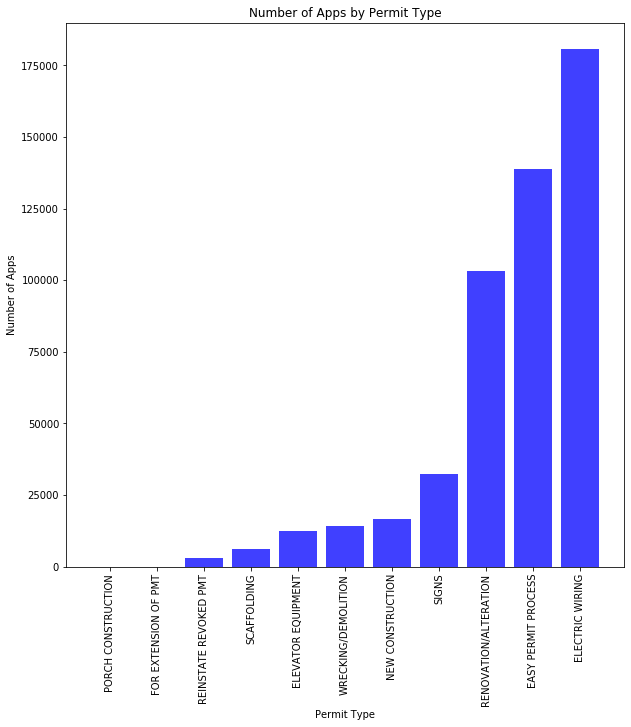

In [146]:
plt.figure(figsize=(10,10))
plt.bar(sorted_app_to_permit_df['permit_type'], sorted_app_to_permit_df['num_of_applications'], color='b', alpha=0.75, align="center")

plt.title("Number of Apps by Permit Type")
plt.xlabel("Permit Type")
plt.xticks(rotation=90)
plt.ylabel("Number of Apps");
plt.savefig('figures/01_obj_0_number_of_apps_by_permit_type.png')

In [147]:
# How many applications are made each month?

month_proc_time_gb=permit_df[['start_month','processing_time']].groupby(['start_month'], as_index=False)

month_num_applications_df=pd.DataFrame(month_proc_time_gb.count())

month_num_applications_df=month_num_applications_df.rename(columns={"processing_time": "num_of_applications"})

month_num_applications_df.to_csv('plot_data/num_app_to_s_month_bar_graph.csv', index=True)

month_num_applications_df

,start_month,num_of_applications
0,1,31542
1,2,31985
2,3,44709
3,4,46574
4,5,46696
5,6,46962
6,7,45250
7,8,47414
8,9,46129
9,10,47592


In [148]:
sorted_app_to_s_month_df = month_num_applications_df.sort_values(by=['num_of_applications'])

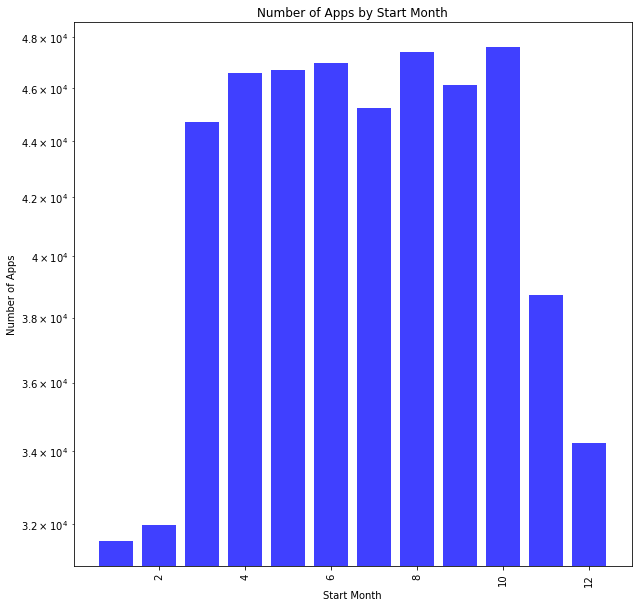

In [149]:
plt.figure(figsize=(10,10))
plt.bar(sorted_app_to_s_month_df['start_month'], sorted_app_to_s_month_df['num_of_applications'], color='b', alpha=0.75, align="center")

plt.title("Number of Apps by Start Month")
plt.xlabel("Start Month")
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel("Number of Apps");
plt.savefig('figures/02_obj_0_number_of_apps_by_start_month.png')

In [150]:
# How many applications were made in each community area?

comm_area_gb=permit_df[['community_area','processing_time']].groupby(['community_area'], as_index=False)

comm_area_num_applications_df=pd.DataFrame(comm_area_gb.count())

comm_area_num_applications_df=comm_area_num_applications_df.rename(columns={"processing_time": "num_of_applications"})

# Apply community area labels
comm_area_num_applications_df=comm_area_num_applications_df.replace({"community_area": community_areas_dict})

comm_area_num_applications_df.to_csv('plot_data/num_app_to_com_areas_bar_graph.csv', index=False)

comm_area_num_applications_df

,community_area,num_of_applications
0,Rogers Park,5529
1,West Ridge,7015
2,Uptown,6947
3,Lincoln Square,6923
4,North Center,9095
...,...,...
72,Washington Heights,4251
73,Mount Greenwood,2675
74,Morgan Park,3828
75,Ohare,6399


In [151]:
sorted_app_to_comm_df = comm_area_num_applications_df.sort_values(by=['num_of_applications'])

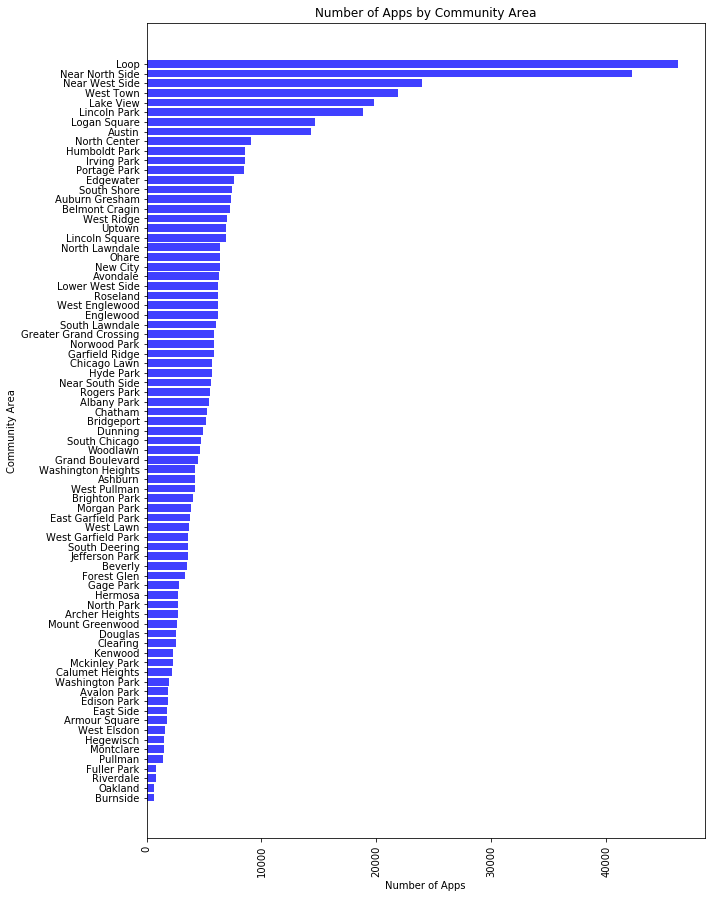

In [152]:
plt.figure(figsize=(10,15))
plt.barh(sorted_app_to_comm_df['community_area'], sorted_app_to_comm_df['num_of_applications'], color='b', alpha=0.75, align="center")

plt.title("Number of Apps by Community Area")
plt.xlabel("Number of Apps")
plt.xticks(rotation=90)
plt.ylabel("Community Area");
plt.savefig('figures/03_obj_0_number_of_apps_by_community_area.png')

## Objective 1: How does start month affect processing time?

,start_month,ave_proc_time
0,1,23.864340
1,2,21.032203
2,3,18.372878
3,4,17.066110
4,5,15.409521
5,6,18.028640
6,7,14.609525
7,8,15.732062
8,9,17.821522
9,10,16.968104


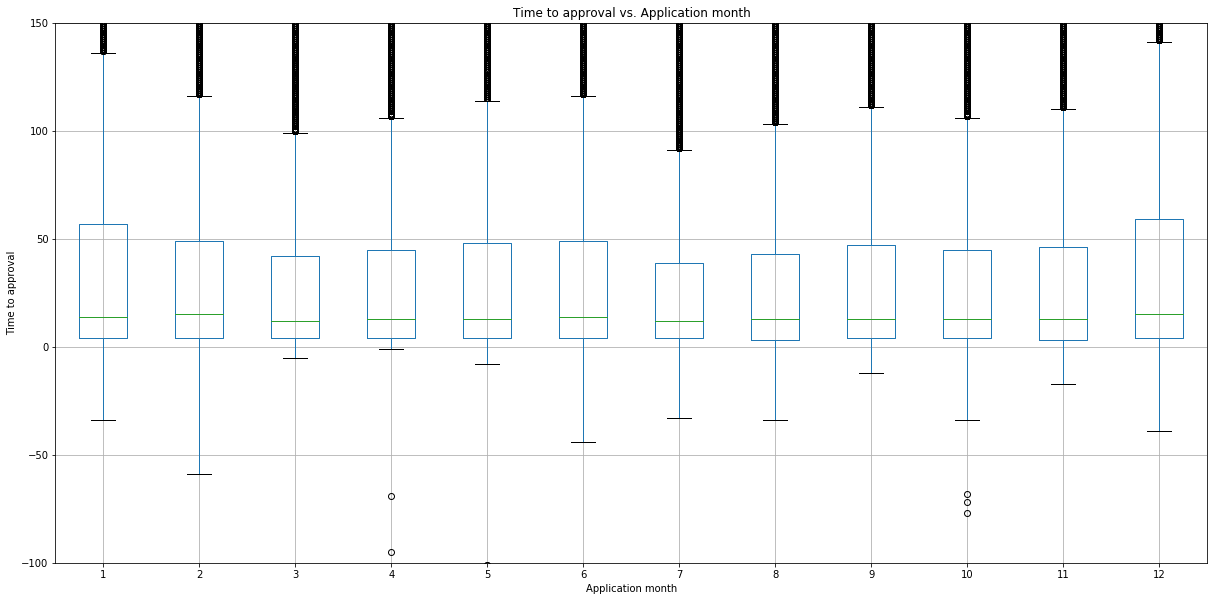

In [153]:
# How many permits are there? (Now defined in initial plots)
# month_proc_time_gb=permit_df[['start_month','processing_time']].groupby(['start_month'], as_index=True)

month_proc_time_df=pd.DataFrame(month_proc_time_gb.mean())

month_proc_time_df=month_proc_time_df.rename(columns={"processing_time": "ave_proc_time"})

# Make a temporary dataframe to hold data where processing time is nonzero.
temp_df=permit_df[['start_month','processing_time']]

temp_df=temp_df[temp_df['processing_time']!=0]

# Create a boxplot to compare means
temp_df.boxplot('processing_time', by='start_month', figsize=(20, 10))

plt.title('Time to approval vs. Application month')
# Remove annoying subtitle
plt.suptitle('')
plt.xlabel('Application month')
plt.ylabel('Time to approval')
plt.ylim((-100,150))
plt.savefig('figures/04_obj_1_start_month_proc_time_box_plot.png')


month_proc_time_df

In [154]:
# Todo ANOVA?

## Objective 2: How does community area affect processing time?

In [155]:
# Data from https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2/data

# File to Load (Remember to Change These)
file_to_load = "data/Per_Capita_Income.csv"

# Read Purchasing File and store into Pandas dataframe
income_data = pd.read_csv(file_to_load)
# Remove empty community number (was for all Chicago)
income_data = income_data[pd.notnull(income_data['Community Area Number'])]


temp_df=income_data[['Community Area Number','PER CAPITA INCOME ']].sort_values(by=['PER CAPITA INCOME '])

community_list_srt_by_inc_idx=temp_df['Community Area Number'].to_list()

community_list_srt_by_inc_idx=[int(number) for number in community_list_srt_by_inc_idx]

community_list_srt_by_inc=[community_areas_dict[number] for number in community_list_srt_by_inc_idx]

temp_df.head()

,Community Area Number,PER CAPITA INCOME
53,54.0,8201
29,30.0,10402
36,37.0,10432
25,26.0,10934
66,67.0,11317


In [156]:
# Make a temporary dataframe to hold data where processing time is nonzero.

temp_df=permit_df[['community_area','processing_time','total_fee']]

temp_df=temp_df[temp_df['processing_time']!=0]

com_ar_proc_time_gb=temp_df.groupby(['community_area'], as_index=False)


com_ar_proc_time_df=pd.DataFrame(com_ar_proc_time_gb.median())

com_ar_proc_time_df=com_ar_proc_time_df.replace({"community_area": community_areas_dict})

com_ar_proc_time_df

#high_inc_df.sort_values(by=['community_area'], ascending=False)

# Could do boxplots again.

,community_area,processing_time,total_fee
0,Rogers Park,12.0,277.0
1,West Ridge,13.0,250.0
2,Uptown,15.0,300.0
3,Lincoln Square,19.0,300.0
4,North Center,26.0,350.0
...,...,...,...
72,Washington Heights,9.0,250.0
73,Mount Greenwood,18.0,325.0
74,Morgan Park,9.0,250.0
75,Ohare,9.0,250.0


In [157]:
#rank_comm_proc_df = com_ar_proc_time_df.sort_values(by=['processing_time'])
rank_comm_proc_df


,community_area,processing_time,total_fee
53,Riverdale,4.0,75.0
50,South Deering,6.0,75.0
54,Hegewisch,7.0,150.0
52,West Pullman,8.0,250.0
61,West Elsdon,8.0,250.0
...,...,...,...
5,Lake View,21.0,300.0
30,Lower West Side,21.0,375.0
21,Logan Square,22.0,350.0
59,Bridgeport,25.0,375.0


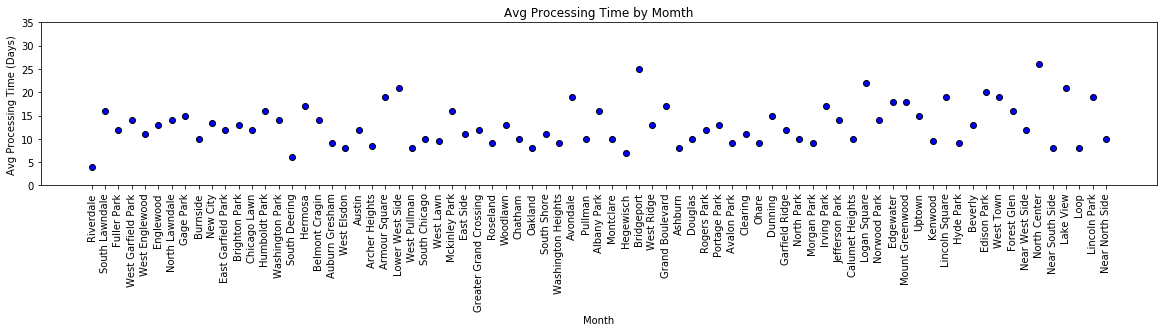

In [158]:
plt.figure(figsize=(20,3))

# Old plot command
#plt.scatter(rank_comm_proc_df["community_area"], rank_comm_proc_df["processing_time"], marker="o", facecolors="blue", 
#           edgecolors="black", alpha=1);

y_values=[rank_comm_proc_df["processing_time"][j-1] for j in community_list_srt_by_inc_idx]

plt.scatter(community_list_srt_by_inc, y_values, marker="o", facecolors="blue", 
           edgecolors="black", alpha=1);

plt.title("Avg Processing Time by Momth")
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.ylabel("Avg Processing Time (Days)")
plt.ylim(0, 35);
plt.savefig('figures/05_obj_2_avg_proc_tm_by_mnth.png')

## Objective 3: How do permits per capita compare across all community areas?

In [159]:
# Data from https://datahub.cmap.illinois.gov/dataset/2010-census-data-summarized-to-chicago-community-areas

# File to Load (Remember to Change These)
file_to_load = "data/CCASF12010CMAP.csv"

# Read Purchasing File and store into Pandas dataframe
population_data = pd.read_csv(file_to_load)
population_data.head()

,GEOGNAME,GEOGKEYX,P0050001,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,...,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128
0,Geog,GeogKey,Total Population,"Not Hispanic or Latino, White alone","Not Hispanic or Latino, Black or African Ameri...","Not Hispanic or Latino, American Indian and Al...","Not Hispanic or Latino, Asian alone","Not Hispanic or Latino, Native Hawaiian and Ot...","Not Hispanic or Latino, Some Other Race alone","Not Hispanic or Latino, Two or More Races",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rogers Park,1,54991,21618,14461,142,3523,39,202,1573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,West Ridge,2,71942,30706,8015,189,16184,3,225,1919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Uptown,3,56362,29098,11275,191,6414,10,130,1235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lincoln Square,4,39493,24916,1488,72,4399,11,128,917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
com_ar_ct_df=pd.DataFrame(com_ar_proc_time_gb.count())

com_ar_ct_df['Total Population']=''
for j in range(0,com_ar_ct_df.shape[0]):
    com_ar_ct_df['Total Population'].iloc[j]=population_data['P0050001'].iloc[int(com_ar_ct_df['community_area'].iloc[j])]
com_ar_ct_df['Total Population']=pd.to_numeric(com_ar_ct_df['Total Population'])

com_ar_ct_df['perm_p_person']=(com_ar_ct_df['processing_time']/com_ar_ct_df['Total Population'])

# Apply community area labels
com_ar_ct_df=com_ar_ct_df.replace({"community_area": community_areas_dict})

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [161]:
com_ar_ct_df

,community_area,processing_time,total_fee,Total Population,perm_p_person
0,Rogers Park,1981,1981,54991,0.036024
1,West Ridge,2652,2652,71942,0.036863
2,Uptown,2642,2642,56362,0.046876
3,Lincoln Square,2615,2615,39493,0.066214
4,North Center,4027,4027,31867,0.126369
...,...,...,...,...,...
72,Washington Heights,1308,1308,26493,0.049372
73,Mount Greenwood,1012,1012,19093,0.053004
74,Morgan Park,1399,1399,22544,0.062056
75,Ohare,1727,1727,12756,0.135387


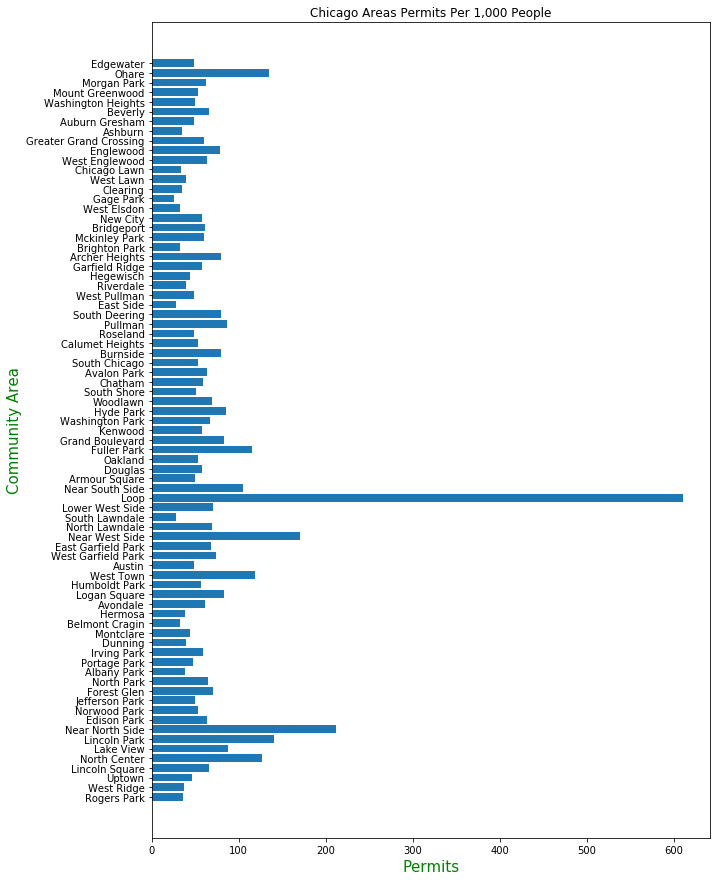

In [175]:
plt.figure(figsize=(10,15))
areas = com_ar_ct_df['community_area']
permits = (com_ar_ct_df['perm_p_person']*1000)
plt.barh(areas, permits)
plt.xlabel('Permits', fontsize=15, color='green')
plt.ylabel('Community Area', fontsize=15, color='green')
plt.title('Chicago Areas Permits Per 1,000 People')
plt.savefig('figures/06_obj_3_chi_are_perm_p_thou.png')

## Objective 4: What is the average permit fee for all projects in a community area?

In [163]:
com_ar_fee_df=pd.DataFrame(com_ar_proc_time_gb.mean())

# Apply community area labels
com_ar_fee_df=com_ar_fee_df.replace({"community_area": community_areas_dict})

com_ar_fee_df

,community_area,processing_time,total_fee
0,Rogers Park,46.298839,1110.240591
1,West Ridge,49.473982,672.893658
2,Uptown,52.032551,2570.414205
3,Lincoln Square,49.050478,970.839683
4,North Center,51.045443,1065.640000
...,...,...,...
72,Washington Heights,37.392202,596.749778
73,Mount Greenwood,40.782609,730.171927
74,Morgan Park,32.140815,515.394096
75,Ohare,29.272727,2027.366427


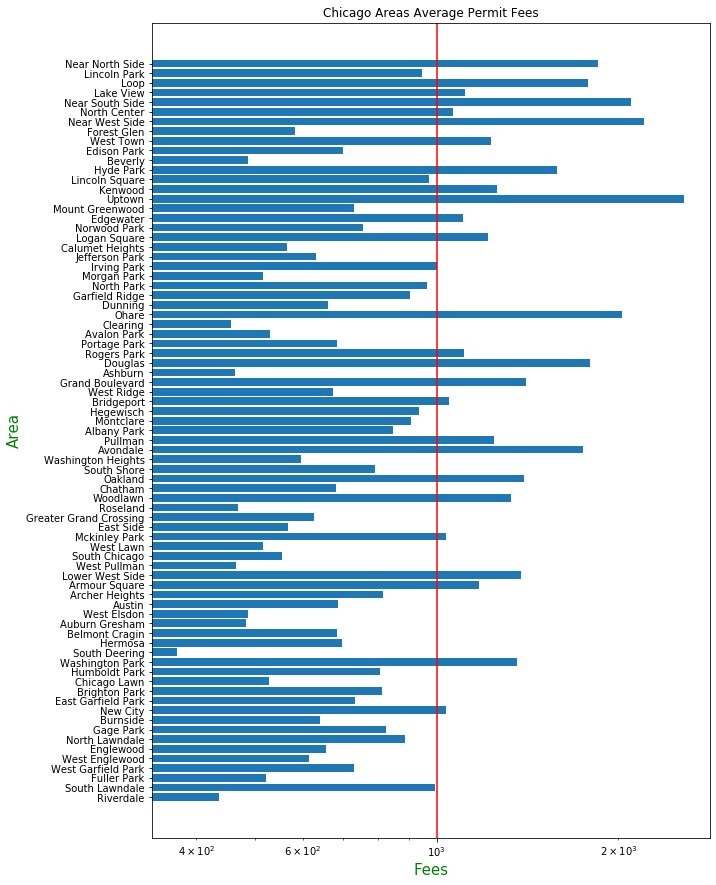

In [174]:
plt.figure(figsize=(10,15))
# areas = com_ar_ct_df['community_area']
# fees = (com_ar_fee_df['total_fee'])
areas=community_list_srt_by_inc
fees=[com_ar_fee_df['total_fee'][j-1] for j in community_list_srt_by_inc_idx]
plt.barh(areas, fees)
plt.xlabel('Fees', fontsize=15, color='green')
plt.ylabel('Area', fontsize=15, color='green')
plt.title('Chicago Areas Average Permit Fees')
# plt.grid(True)
plt.xscale('log')
plt.axvline(x=1000, color='red')
plt.savefig('figures/07_obj_4_chi_are_perm_fees.png')

## Objective 5: How do types of permits applied for differ between the community areas with the highest and lowest per capita income?


In [165]:


# Change Community Area Numbers to integers.
income_data['Community Area Number']=income_data['Community Area Number'].astype('int')

income_data.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [166]:
for col in income_data.columns: 
    print(col) 

Community Area Number
COMMUNITY AREA NAME
PERCENT OF HOUSING CROWDED
PERCENT HOUSEHOLDS BELOW POVERTY
PERCENT AGED 16+ UNEMPLOYED
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
PERCENT AGED UNDER 18 OR OVER 64
PER CAPITA INCOME 
HARDSHIP INDEX


In [167]:
max_index=income_data['PER CAPITA INCOME '].idxmax()
min_index=(-income_data['PER CAPITA INCOME ']).idxmax()
print(f'Highest per capita income in {community_areas_dict[max_index]}, community number {max_index}.')
print(f'Lowest per capita income in {community_areas_dict[min_index]}, community number {min_index}.')

Highest per capita income in Lincoln Park, community number 7.
Lowest per capita income in West Pullman, community number 53.


In [168]:
# Find proportions of permit types in high income community area

high_inc_gb=permit_df[permit_df['community_area']==max_index][['permit_type','community_area']].groupby(['permit_type'], as_index=False)

high_inc_df=pd.DataFrame(high_inc_gb.count())

high_inc_df=high_inc_df.sort_values(by=['community_area'], ascending=False)

high_inc_df=high_inc_df.rename(columns={'community_area': 'high_proportion'})

high_inc_total=high_inc_df['high_proportion'].sum()

high_inc_df['high_proportion']=high_inc_df['high_proportion']/high_inc_total

high_inc_df

,permit_type,high_proportion
1,ELECTRIC WIRING,0.328743
0,EASY PERMIT PROCESS,0.252074
5,RENOVATION/ALTERATION,0.189653
7,SIGNS,0.078052
3,NEW CONSTRUCTION,0.054498
8,WRECKING/DEMOLITION,0.039398
2,ELEVATOR EQUIPMENT,0.034400
6,SCAFFOLDING,0.016482
4,REINSTATE REVOKED PMT,0.006699


In [169]:
# Find proportions of permit types in low income community area

low_inc_gb=permit_df[permit_df['community_area']==min_index][['permit_type','community_area']].groupby(['permit_type'], as_index=False)

low_inc_df=pd.DataFrame(low_inc_gb.count())

low_inc_df=low_inc_df.sort_values(by=['community_area'], ascending=False)

low_inc_df=low_inc_df.rename(columns={'community_area': 'low_proportion'})

low_inc_total=low_inc_df['low_proportion'].sum()

low_inc_df['low_proportion']=low_inc_df['low_proportion']/low_inc_total

low_inc_df

,permit_type,low_proportion
1,ELECTRIC WIRING,0.389313
0,EASY PERMIT PROCESS,0.350429
5,RENOVATION/ALTERATION,0.103769
8,WRECKING/DEMOLITION,0.094466
7,SIGNS,0.021708
2,ELEVATOR EQUIPMENT,0.019800
3,NEW CONSTRUCTION,0.017653
4,REINSTATE REVOKED PMT,0.002147
6,SCAFFOLDING,0.000716


In [170]:
# Merge data for low and high income


high_low_df=pd.merge(high_inc_df, low_inc_df, on='permit_type')

high_low_df.to_csv('plot_data/high_low_income_permit_type_proportions.csv', index=False)

high_low_df

,permit_type,high_proportion,low_proportion
0,ELECTRIC WIRING,0.328743,0.389313
1,EASY PERMIT PROCESS,0.252074,0.350429
2,RENOVATION/ALTERATION,0.189653,0.103769
3,SIGNS,0.078052,0.021708
4,NEW CONSTRUCTION,0.054498,0.017653
5,WRECKING/DEMOLITION,0.039398,0.094466
6,ELEVATOR EQUIPMENT,0.034400,0.019800
7,SCAFFOLDING,0.016482,0.000716
8,REINSTATE REVOKED PMT,0.006699,0.002147


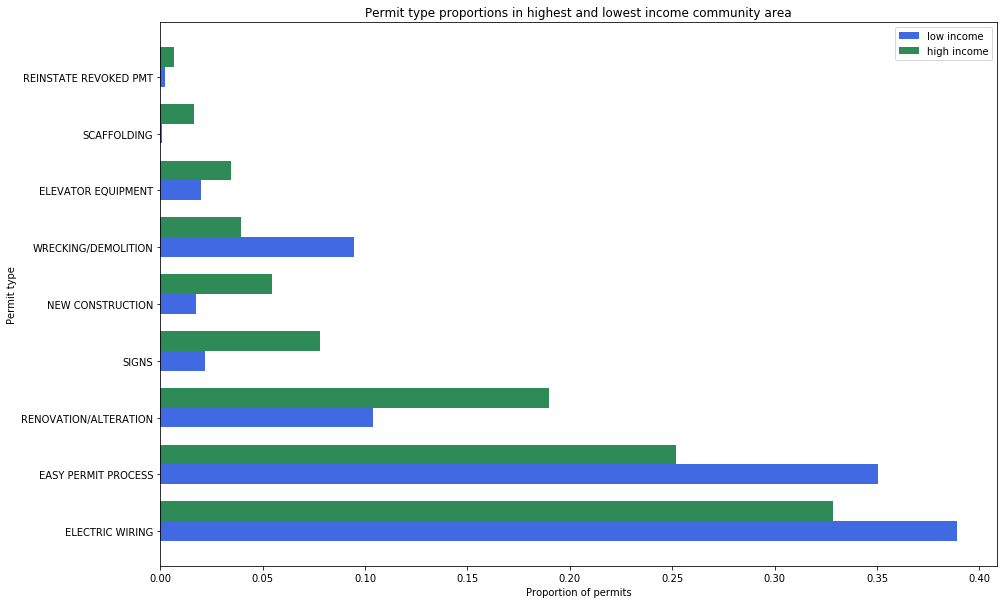

In [171]:
high_prop_list=high_low_df['high_proportion'].to_list()
low_prop_list=high_low_df['low_proportion'].to_list()
permit_list=high_low_df['permit_type'].to_list()
y_data=[y for y in range(0,len(high_prop_list))]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
width = 0.35
ax.barh(y_data, low_prop_list, width, color='royalblue', label='low income')
ax.barh(y_data+np.array(width), high_prop_list, width, color='seagreen', label='high income')
ax.set_yticklabels(permit_list)
ax.set_yticks(np.arange(len(y_data)))
#plt.xscale('log')
plt.xlabel('Proportion of permits')
plt.ylabel('Permit type')
plt.legend()
plt.title('Permit type proportions in highest and lowest income community area')
plt.savefig('figures/08_obj_5_chi_are_perm_fees.png')

## What location paid the most permit fees?  (in each community area)

In [172]:
# Takes a long time to run

#com_area_indexes=pd.to_numeric(permit_df['community_area'].dropna()).tolist()

#com_area_indexes=[int(index) for index in com_area_indexes]

com_area_indexes=permit_df['community_area'].tolist()

max_indicies=[permit_df[(permit_df['community_area']==index)]['total_fee'].idxmax() for index in com_area_indexes]



KeyboardInterrupt: 

In [ ]:
# Create data frame to store information on highest permit fee locations and populate it.
max_fee_loc_df = pd.DataFrame(columns=['community_area','total_fee','latitude','longitude'])                      
i = 0
for j in max_indicies:
    max_fee_loc_df.loc[i]=[permit_df['community_area'][j],
                           permit_df['total_fee'][j],
                           permit_df['latitude'][j],
                           permit_df['longitude'][j]]
    i+=1
    
# Apply community area labels
max_fee_loc_df=max_fee_loc_df.replace({"community_area": community_areas_dict})

max_fee_loc_df

In [ ]:
per_type_gb=permit_df[['permit_type','processing_time','total_fee']].groupby(['permit_type'], as_index=False)

per_type_sum_df=pd.DataFrame(per_type_gb.sum())

per_type_sum_df

In [ ]:
per_type_ct_df=pd.DataFrame(per_type_gb.count())

per_type_ct_df

In [ ]:
per_type_mth_gb=permit_df[['permit_type','start_month','processing_time','total_fee']].groupby([
    'permit_type','start_month'], as_index=False)

per_type_mth_ct_df=pd.DataFrame(per_type_mth_gb.count())

per_type_mth_ct_df[per_type_mth_ct_df['permit_type']=='PERMIT - EASY PERMIT PROCESS']

In [ ]:

per_type_mth_ct_df[per_type_mth_ct_df['permit_type']=='PERMIT - RENOVATION/ALTERATION']

In [ ]:
per_type_mth_ct_df=pd.DataFrame(per_type_mth_gb.count())
per_type_mth_ct_df